# **03. histplot(히스토그램) 실습**
</br>
<img src="https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png">
</br>

* matplotlib 문법 관련 공식 문서 : https://matplotlib.org/stable/api/pyplot_summary.html
* seaborn histplot 문법 관련 공식 문서 : https://seaborn.pydata.org/generated/seaborn.histplot.html

## **PART1. 각종 세팅**

In [1]:
# 필요 패키지 호출
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 실습용 데이터가 저장된 폴더
path = r'C:\HANSSAK\SecureGate\Download\DT_Python 시각화'
print('작업 폴더 주소 : ', path)

# 출력 옵션 지정
pd.set_option('display.width', 2000)                  # 한줄에 표시할 컬럼 관련
pd.set_option('display.max_colwidth', None)           # 최대 컬럼너비 (None 지정시 데이터 생략 없음)
pd.options.display.float_format = '{:.2f}'.format     # 표시할 숫자 형식 (지수형태 표현에서 소숫점 2자리까지로)

작업 폴더 주소 :  C:\HANSSAK\SecureGate\Download\DT_Python 시각화


## **PART2. 데이터 로드**

In [8]:
# 데이터 로드 및 정보 / 요약통계량 확인
# pd.read_csv() 메서드 사용

# 데이터프레임명 : df
# 사용할 rawfile : janamt_by_grade.csv
# 한글 인코딩 형식 : cp949

df = 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21233 entries, 0 to 21232
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   연도           21233 non-null  object
 1   고객번호         21233 non-null  int64 
 2   개인법인사업자구분명   21233 non-null  object
 3   보증잔액         21233 non-null  int64 
 4   통합통계거래상대처은행  21233 non-null  object
 5   신용등급         21233 non-null  object
dtypes: int64(2), object(4)
memory usage: 995.4+ KB


,고객번호,보증잔액
count,21233.00,21233.00
mean,55012266.55,176694372.37
std,25921700.45,296667357.52
min,10022592.00,600000.00
25%,32555869.00,50000000.00
50%,55111954.00,100000000.00
75%,77487097.00,205600000.00
max,99992437.00,10000000000.00


In [6]:
# 상위 5개 관측치 확인


,연도,고객번호,개인법인사업자구분명,보증잔액,통합통계거래상대처은행,신용등급
0,2018-12-31,47580842,개인사업자,40000000,중소기업은행,KR10
1,2018-12-31,62820638,개인사업자,72000000,농업협동조합,KR11
2,2018-12-31,46775714,법인사업자,29580000,우리은행,KR14
3,2018-12-31,19831749,개인사업자,50000000,신한은행,KR08
4,2018-12-31,33966188,개인사업자,30000000,대구은행,KR14


## **PART3. 데이터 집계**

* 업체별 보증잔액 집계
    * 원장 단위 데이터를 업체 단위로 집계
    * 기업형태(개인, 법인)도 구분할 것


In [17]:
# 고객번호, 기업형태를 행으로하여 보증잔액을 합계

# pd.pivot_table() 메서드 사용
# 1원 단위의 보증잔액을 1억원 단위로 변경

df_agg = 

,고객번호,개인법인사업자구분명,보증잔액
0,10022592,개인사업자,0.88
1,10023863,개인사업자,0.45
2,10026832,법인사업자,4.28
3,10030150,개인사업자,0.23
4,10047764,법인사업자,1.35
...,...,...,...
21228,99974841,개인사업자,4.75
21229,99978609,개인사업자,1.71
21230,99979181,개인사업자,0.42
21231,99986991,법인사업자,0.72


## **PART4. 그래프 생성**

In [15]:
# Seaborn 스타일 설정
sns.set_style('whitegrid')

# 한글폰트 관련 패치
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

(1.0, 10.0)

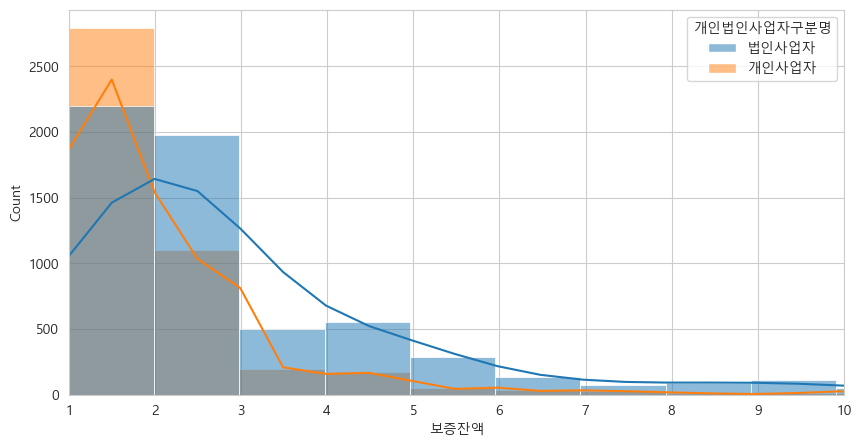

In [39]:
# 도화지 / 좌표계 / 그래프 객체 생성

# 도화지의 크기는 가로 1,000px / 세로 500px로 할 것
# 소액보증은 제외하기 위해 보증잔액이 1(억원) 이상인 업체만 표시할 것
# 보증잔액을 적절한 구간으로 나눠, 해당 구간에 속하는 업체수(빈도)를 표시하되,
# 기업형태(개인/법인)별로 다른 색으로 표시할 것
# kde = 파라미터를 통해 밀도 추정 그래프를 표시할 것
# elemet = 파라미터의 값을 바꾸면 출력이 어떻게 변하는지 확인할 것 (문법 공식 문서 참조)  {“bars”, “step”, “poly”}
# bins = 파라미터를 바꿔 계급 구간이 어떻게 바뀌는지 확인할 것
# plt.xlim() 메서드를 사용해 x축의 범위를 적절히 제한할 것

fig = plt.figure(figsize = [10, 5])


### **(참고) 데이터(보증잔액)의 비대칭도와 정규성 확인**
* 왜도 : 데이터가 비대칭한 정도로, 우측으로 긴 꼬리가 있는 경우(값이 큰 이상치가 있는 경우) 양의 값을, 좌측으로 긴 꼬리가 있는 경우(값이 작은 이상치가 있는 경우) 음의 값을 갖고 대칭일 경우 0의 값을 가짐
* 정규성 검정 : 데이터의 분포가 정규분포를 따르는지 확인하는 것으로, 관측치의 개수가 5,000개보다 많은 경우 KS검정을, 적은 경우 Shapiro-Wilk 검정을 수행함
    * 귀무가설($H0$) : 데이터가 정규분포를 따른다
    * 대립가설($H1$) : 데이터가 정규분포를 따르지 않는다
    * 검정통계량의 p-value와 유의수준(0.1 / 0.05 / 0.01)을 확인해 귀무가설 기각 여부를 판단

In [40]:
from scipy.stats import skew, kstest
print('왜도 :',round(skew(df_agg['보증잔액']), 2))
print('정규성검정 p-value : ',round(kstest(df_agg['보증잔액'], 'norm')[1], 2))

왜도 : 11.9
정규성검정 p-value :  0.0


## **PART5. CHALLENGING**🔥 - 보증잔액을 로그변환한 그래프 생성

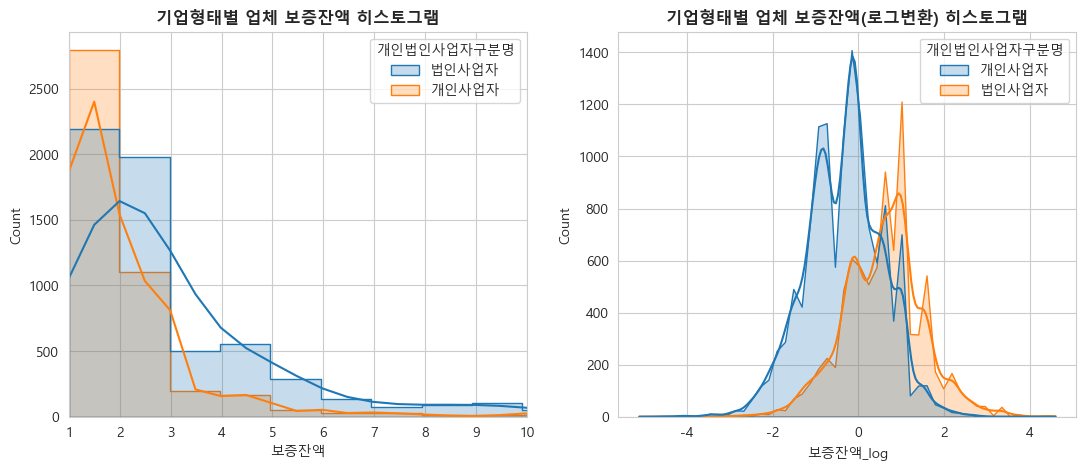

In [44]:
# 로그변환 보증잔액 생성
df_agg['보증잔액_log'] = np.log(df_agg['보증잔액'])

# 그래프 생성
fig = plt.figure(figsize = [13, 5])
plt.subplot(121)
sns.histplot(data = df_agg[df_agg['보증잔액'] >= 1], x = '보증잔액', element = 'step',
             kde = True, hue = '개인법인사업자구분명', bins = 100)
plt.xlim(1, 10)
plt.title("기업형태별 업체 보증잔액 히스토그램", fontweight = 'bold')

plt.subplot(122)
sns.histplot(data = df_agg, x = '보증잔액_log', element = 'poly',
             kde = True, hue = '개인법인사업자구분명', bins = 50)
# plt.xlim(15, 23)
plt.title("기업형태별 업체 보증잔액(로그변환) 히스토그램", fontweight = 'bold');

### **(참고) 로그변환 보증잔액의 비대칭도와 정규성 확인**

In [18]:
print('왜도 :', round(skew(df_agg['보증잔액_log']), 2))
print('정규성검정 p-value : ',round(kstest(df_agg['보증잔액_log'], 'norm')[1], 2))

왜도 : 0.01
정규성검정 p-value :  0.0


* 데이터 변환 결과 비대칭은 치유되었으나, 일반심사와 표준심사 구간의 쌍봉 구조로 인해 정규성은 만족하지 않음